Question 1.1

In [1]:
from __future__ import division
import numpy as np
import numpy.random as rnd

nb = 1000
Mb = 10000
M = nb * Mb
rnd.seed() # initialize the list of random numbers
z = rnd.random_sample((nb,Mb))
Z = np.mean(z, axis = 1)
mean_z = np.mean(z)
mean_Z = np.mean(Z)
mean_z2 = np.mean(z*z)
mean_Z2 = np.mean(Z*Z)
var_z = mean_z2- mean_z * mean_z
var_Z = mean_Z2 - mean_Z * mean_Z
print('Mean of z =', mean_z)
print('Mean of Z =', mean_Z)
print('Variance of z =', var_z)
print('Variance of Z =', var_Z)
print('Variance of Z times Mb =', var_Z * Mb, '(should be equal to the variance of z)')

Mean of z = 0.5001386705310279
Mean of Z = 0.5001386705310281
Variance of z = 0.08330381680892723
Variance of Z = 8.12917133119484e-06
Variance of Z times Mb = 0.0812917133119484 (should be equal to the variance of z)


Question 1.2

In [2]:
nb = 1000
Mb = 10000
M = nb * Mb
p = 0.8
t = np.zeros((nb,Mb))
rnd.seed() # initialize the list of random numbers
tm1 = rnd.random_sample()
t[0,0] = tm1
for i in range(1, M):
    tm2 = rnd.random_sample()
    if ( ( ( tm2 >= 0.5 ) and ( tm1 <= 0.5 ) ) or ( ( tm2 <= 0.5 ) and ( tm1 >= 0.5 ) ) ):
        eta = rnd.random_sample()
        if ( eta < p ):
            tm2 = tm1 
    nl = i // Mb
    t[nl,i - nl * Mb] = tm2
    tm1 = tm2
T = np.mean(t, axis = 1)
mean_t = np.mean(t)
mean_T = np.mean(T)
mean_t2 = np.mean(t * t)
mean_T2 = np.mean(T * T)
var_t = mean_t2 - mean_t * mean_t
var_T = mean_T2 - mean_T * mean_T
tau = var_T * Mb / var_t * 0.5
print('Autocorrelation time = ', tau)

Autocorrelation time =  3.5729125912221695


One can then realise the same exercise for different values of $p$ and plot $\tau$ as a function of $p$. Besides, to be more precise, the experiment should be done several times for a given value of $p$, because $\tau$ fluctuates from one experiment to another.

In this example, we estimate the uncertainty on $\tau$ by computing the standard deviation of $\tau$ found for different realizations for the same value of $p$ and then dividing by the square root of the number of realizations. More sophisticated tools could be used, like the bootstrap or the jackknife methods [see *Monte Carlo Methods in Statistical Physics*, Newman and Barkema, Oxford University Press (1999) and below].

/tmp/ipykernel_3091414/2626402959.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


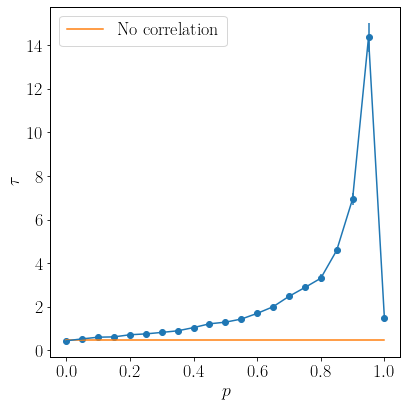

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Direct input
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{lmodern} \usepackage{bm}')
#Options
params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 1.

nb = 100
Mb = 1000
nr = 10 # number of repetitions for a given value of p
M = nb * Mb
p_arr = np.arange(0., 1.05, 0.05)
tau_arr = np.zeros(len(p_arr))
tau_arr2 = np.zeros(len(p_arr))
for j in range(len(p_arr)):
    ir = 0
    while ir < nr:
        t = np.zeros((nb,Mb))
        rnd.seed() # initialize the list of random numbers
        tm1 = rnd.random_sample()
        t[0,0] = tm1
        for i in range(1, M):
            tm2 = rnd.random_sample()
            if ( ( ( tm2 >= 0.5 ) and ( tm1 <= 0.5 ) ) or ( ( tm2 <= 0.5 ) and ( tm1 >= 0.5 ) ) ):
                eta = rnd.random_sample()
                if ( eta < p_arr[j] ):
                    tm2 = tm1 
            nl = i // Mb
            t[nl,i - nl * Mb] = tm2
            tm1 = tm2
        T = np.mean(t, axis = 1)
        mean_t = np.mean(t)
        mean_T = np.mean(T)
        mean_t2 = np.mean(t * t)
        mean_T2 = np.mean(T * T)
        var_t = mean_t2 - mean_t * mean_t
        var_T = mean_T2 - mean_T * mean_T
        tau = var_T * Mb / var_t * 0.5
        tau_arr[j] += tau 
        tau_arr2[j] += tau * tau
        ir +=1
    tau_arr[j] /= nr
    tau_arr2[j] /= ( nr - 1 )
    tau_arr2[j] -= tau_arr[j] ** 2 * nr / (nr - 1)
    tau_arr2[j] **= 0.5

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.scatter(p_arr, tau_arr)
ax.errorbar(p_arr, tau_arr, tau_arr2 / np.sqrt(nr))
ax.plot(p_arr, np.ones(len(p_arr)) * 0.5, '-', label = 'No correlation')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\tau$')
ax.legend()
fig.show()

In the jackknife method, if one has $\tau_1$, $\tau_2$, $\dots$, $\tau_n$ $n$ estimates of a quantity, the expected value is given by the mean of the measurements, namely,
$$ \tau = \frac{1}{n}\sum_{i=1}^n\tau_i.$$
For the uncertainty, one computes for each $i$ 
$$\tau^{(i)}=\frac{1}{n-1}\sum_{\substack{i'=1 \\ i'\neq i}}^{n} \tau_{i'}$$ 
the mean over all the measurements except $\tau_i$, and the uncertainty is eventually given by
$$\sigma_\mathrm{jackknife} = \sqrt{\sum_{i=1}^n\left[\tau^{(i)}-\tau\right]^2}.$$

In the bootstrap method, one repeats the following procedure multiple $n_\mathrm{bootstrap}$ times (for $j=1\dots n_\mathrm{bootstrap}$):
1. choose $n$ values of $\tau_i$ among the list $[\tau_1,\ \tau_2,\ \dots,\ \tau_n]$ (one value of $\tau_i$ can be picked up multiple times),
2. compute their average $\tau^{[j]}$.

The uncertainty is eventually given by
$$\sigma_\mathrm{bootstrap} = \sqrt{\frac{1}{n_\mathrm{bootstrap}}\sum_{j=1}^{n_\mathrm{bootstrap}}\left(\tau^{[j]}\right)^2-\left(\frac{1}{n_\mathrm{bootstrap}}\sum_{j=1}^{n_\mathrm{bootstrap}}\tau^{[j]}\right)^2}.$$

**The jackknife method only works for independent measurements, while the bootstrap method can be used even when the samples are correlated**. In the following, we implement the jackknife method to obtain the uncertainty of $\tau$ for a given value of $p$.

/tmp/ipykernel_3091414/2561119146.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


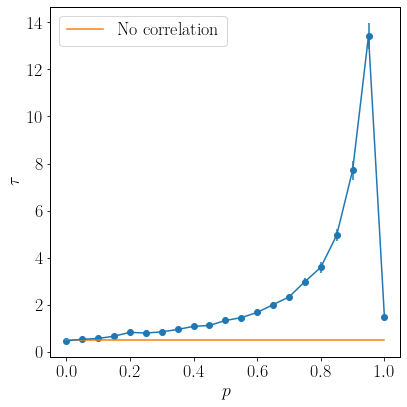

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Direct input
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{lmodern} \usepackage{bm}')
#Options
params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 1.

nb = 100
Mb = 1000
nr = 10 # number of repetitions for a given value of p
M = nb * Mb
p_arr = np.arange(0., 1.05, 0.05)
tau_arr = np.zeros(len(p_arr))
tau_err_arr = np.zeros(len(p_arr))
for j in range(len(p_arr)):
    ir = 0
    tau_list = []
    while ir < nr:
        t = np.zeros((nb,Mb))
        rnd.seed() # initialize the list of random numbers
        tm1 = rnd.random_sample()
        t[0,0] = tm1
        for i in range(1, M):
            tm2 = rnd.random_sample()
            if ( ( ( tm2 >= 0.5 ) and ( tm1 <= 0.5 ) ) or ( ( tm2 <= 0.5 ) and ( tm1 >= 0.5 ) ) ):
                eta = rnd.random_sample()
                if ( eta < p_arr[j] ):
                    tm2 = tm1 
            nl = i // Mb
            t[nl,i - nl * Mb] = tm2
            tm1 = tm2
        T = np.mean(t, axis = 1)
        mean_t = np.mean(t)
        mean_T = np.mean(T)
        mean_t2 = np.mean(t * t)
        mean_T2 = np.mean(T * T)
        var_t = mean_t2 - mean_t * mean_t
        var_T = mean_T2 - mean_T * mean_T
        tau_list += [ var_T * Mb / var_t * 0.5 ]
        ir +=1
    tau_list = np.array(tau_list)
    tau_arr[j] = np.mean(tau_list)
    for k in range(nr):
        tau_avg_tmp = nr * tau_arr[j] - tau_list[k]
        tau_avg_tmp /= ( nr - 1 )
        tau_err_arr[j] += ( tau_avg_tmp - tau_arr[j] ) ** 2
    tau_err_arr[j] **= 0.5

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.scatter(p_arr, tau_arr)
ax.errorbar(p_arr, tau_arr, tau_err_arr)
ax.plot(p_arr, np.ones(len(p_arr)) * 0.5, '-', label = 'No correlation')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\tau$')
ax.legend()
fig.show()

Question 1.3

One can compute the autocorrelation function of $\theta_i$ to measure its correlation time. It is found to be of the order of several $\tau$.

Autocorrelation time =  7.4443900262873886


/tmp/ipykernel_3091414/2307512888.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


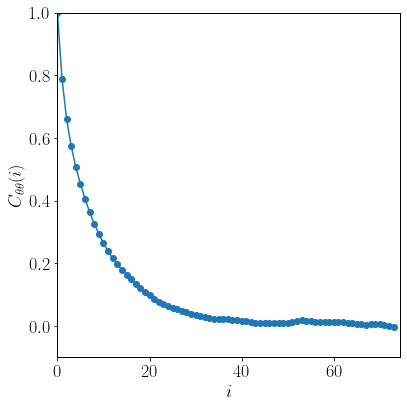

In [5]:
nb = 100
Mb = 1000
M = nb * Mb
p = 0.9
t = np.zeros((nb,Mb))
rnd.seed() # initialize the list of random numbers
tm1 = rnd.random_sample()
t[0,0] = tm1
for i in range(1, M):
    tm2 = rnd.random_sample()
    if ( ( ( tm2 >= 0.5 ) and ( tm1 <= 0.5 ) ) or ( ( tm2 <= 0.5 ) and ( tm1 >= 0.5 ) ) ):
        eta = rnd.random_sample()
        if ( eta < p ):
            tm2 = tm1 
    nl = i // Mb
    t[nl,i - nl * Mb] = tm2
    tm1 = tm2
T = np.mean(t, axis = 1)
mean_t = np.mean(t)
mean_T = np.mean(T)
mean_t2 = np.mean(t * t)
mean_T2 = np.mean(T * T)
var_t = mean_t2 - mean_t * mean_t
var_T = mean_T2 - mean_T * mean_T
tau = var_T * Mb / var_t * 0.5
print('Autocorrelation time = ',tau)

t = t.reshape(M)
correl = np.zeros(int(10 * tau))
for i in range(1, len(correl)):
    correl[i] = np.mean(t[i:] * t[:-i]) - mean_t * mean_t
    correl[i] /= var_t
correl[0] = 1.

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.plot(correl, '-o')
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'$C_{\theta\theta}(i)$')
ax.set_xlim(0, 10 * tau)
ax.set_ylim(-0.1, 1)
fig.show()

One can then do this for several values of $p$ (or $\tau$) to more clearly see the evolution of the autocorrelation time with $p$. Here, we do not repeat the experiment several times for a given value of $p$.

/tmp/ipykernel_3091414/1220418260.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


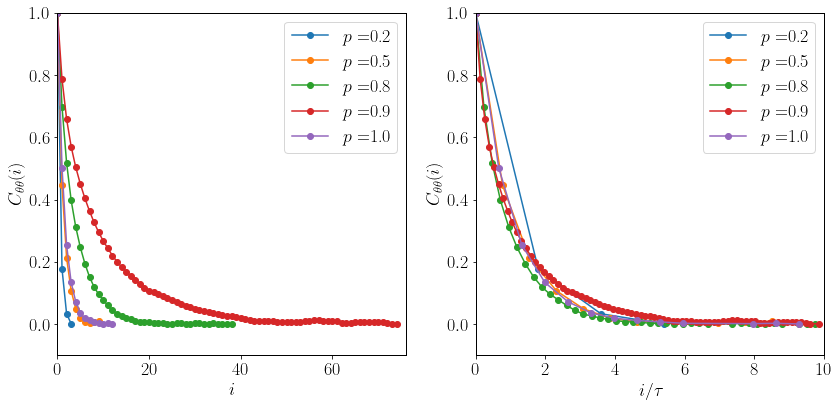

In [6]:
nb = 100
Mb = 1000
M = nb * Mb
p_arr = np.array([0.2, 0.5, 0.8, 0.9, 1.])
tau_arr = np.zeros(len(p_arr))
correl = np.zeros((len(p_arr), M))
for j in range(len(p_arr)):
    t = np.zeros((nb,Mb))
    rnd.seed() # initialize the list of random numbers
    tm1 = rnd.random_sample()
    t[0,0] = tm1
    for i in range(1, M):
        tm2 = rnd.random_sample()
        if ( ( ( tm2 >= 0.5 ) and ( tm1 <= 0.5 ) ) or ( ( tm2 <= 0.5 ) and ( tm1 >= 0.5 ) ) ):
            eta = rnd.random_sample()
            if ( eta < p_arr[j] ):
                tm2 = tm1 
        nl = i // Mb
        t[nl,i - nl * Mb] = tm2
        tm1 = tm2
    T = np.mean(t, axis = 1)
    mean_t = np.mean(t)
    mean_T = np.mean(T)
    mean_t2 = np.mean(t * t)
    mean_T2 = np.mean(T * T)
    var_t = mean_t2 - mean_t * mean_t
    var_T = mean_T2 - mean_T * mean_T
    tau_arr[j] = var_T * Mb / var_t * 0.5
    
    t = t.reshape(M)
    for i in range(1, int(10*tau_arr[j])):
        correl[j,i] = np.mean(t[i:] * t[:-i]) - mean_t * mean_t
        correl[j,i] /= var_t
    correl[j,0] = 1.

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
for j in range(len(p_arr)):
    ax[0].plot(correl[j,:][correl[j,:] > 0.], '-o', label = r'$p=$' + '{0}'.format(p_arr[j]))
    ax[1].plot(np.arange(M)[correl[j,:] > 0.] / tau_arr[j], correl[j,:][correl[j,:] > 0.], '-o', 
    label = r'$p=$' + '{0}'.format(p_arr[j]))
ax[0].set_xlabel(r'$i$')
ax[1].set_xlabel(r'$i / \tau$')
ax[0].set_ylabel(r'$C_{\theta\theta}(i)$')
ax[1].set_ylabel(r'$C_{\theta\theta}(i)$')
ax[0].set_xlim(0, 10 * np.amax(tau_arr))
ax[1].set_xlim(0, 10)
ax[0].set_ylim(-0.1, 1)
ax[1].set_ylim(-0.1, 1)
ax[0].legend()
ax[1].legend()
fig.show()

Question 2.1

The first parameter to fix is $\Delta$. A larger value of $\Delta$ leads to a large exploration of the distribution but the acceptance rate drops significantly. Instead, a small value of $\Delta$ leads to a large acceptance rate, but the exploration of the distribution is quite unefficient. Generally, the value of $\Delta$ is chosen so that the acceptance rate varies between 20\% and 50\%. Here this corresponds to $\Delta\in[2,\ 5]$. For instance, in this particular case, $\Delta \simeq 2$ is a reasonable value.

/tmp/ipykernel_3091414/2932757898.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


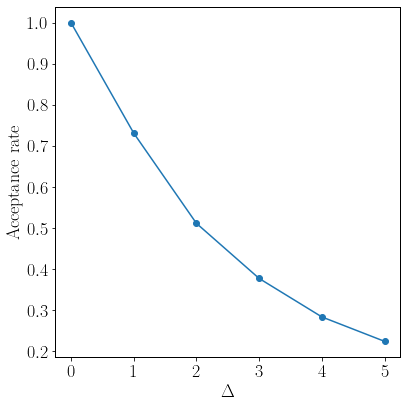

In [7]:
def proba(y):
    return np.exp(- y * y) / np.sqrt(np.pi)

# Check the influence of Delta on the acceptance rate
Delta = np.arange(0., 6., 1.)
Acc_rate = np.zeros(len(Delta))
M = 10000
for j in range(len(Delta)):
    x = 0.
    i = 0
    rnd.seed()
    while i < M:
        dx = Delta[j] * ( - 1. + 2. * rnd.random_sample() )
        if proba(x + dx) > proba(x):
            x += dx
            Acc_rate[j] += 1.
        else:
            r = rnd.random_sample()
            if proba(x + dx) / proba(x) > r:
                x += dx
                Acc_rate[j] += 1.
        i += 1
    Acc_rate[j] /= M

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.plot(Delta, Acc_rate, '-o')
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'Acceptance rate')
fig.show()

Then comes the choice of $M$. The latter should be taken larger-enough so that $x$ correctly samples its probability distribution, at least close to its maximum at $x=0$ and over several times the typical standard deviation. In particular, $M$ should be taken much larger than the autocorrelation time, namely the number of steps over which $x$ is correlated. This can be checked by computing the autocorrelation time $C_{xx}(n)$. For $\Delta=2$, one finds that $M$ should be taken much larger than 20. One can also look at the mean squared displacement of $x$ in comparison to the variance $\sigma^2=1/2$ of the distribution $p(x)$, when averaging over several trajectories (or sequences or random numbers).

/tmp/ipykernel_3091414/2165273042.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


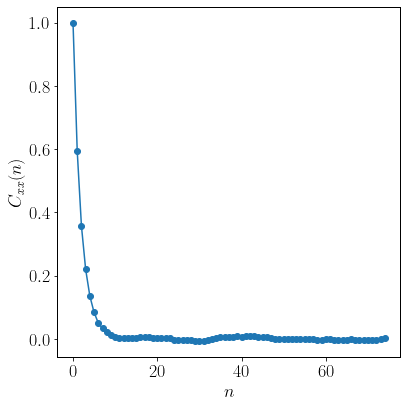

In [8]:
x = 0.
Delta = 2.
M = 150000
i = 0
rnd.seed()
xx = [ x ]
while i < M:
    dx = Delta * ( - 1. + 2. * rnd.random_sample() )
    if proba(x + dx) > proba(x):
        x += dx
    else:
        r = rnd.random_sample()
        if proba(x + dx) / proba(x) > r:
            x += dx
    xx += [ x ]
    i += 1

C = np.zeros(M // 2000)
xx = np.array(xx)
for i in range(1, len(C)):
    C[i] = np.mean(xx[i:] * xx[:-i])
C -= np.mean(xx) ** 2
C /= np.var(xx)
C[0] = 1.

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.plot(C, '-o')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$C_{xx}(n)$')
fig.show()

We have now all parameters under control and we can answer the question.

A priori, here, we could take $M_\mathrm{eq}=0$ if we start from $x=0$. This is because if one thinks as the Monte-Carlo method as a way of exploring the canonical distribution in the potentiel $V(x)\propto x^2$, $x=0$ is the equilibrium position (its mean value) and starting from here, one directly samples the relevant part of the distribution. But this can result in sampling issues because the system does not want to leave its equilibrium state. It is thus reasonable to take $M_\mathrm{eq}>0$ of several times the autocorrelation time computed above.

The computation gives a Fourier transform consistent with the expectation, at least close to $k=0$. The deviations increases as $k$ gets larger because of an unsufficient sampling of the distribution (the probability to visit large and rare values of $|x|$ decays exponentially. This can be cured via importance sampling algorithm, like umbrella sampling [see *Monte Carlo Methods in Statistical Physics*, Newman and Barkema, Oxford University Press (1999) or *Understanding Molecular Simulation*, Frenkel and Smit, Academic Press (1996)].

/tmp/ipykernel_3091414/2592788074.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


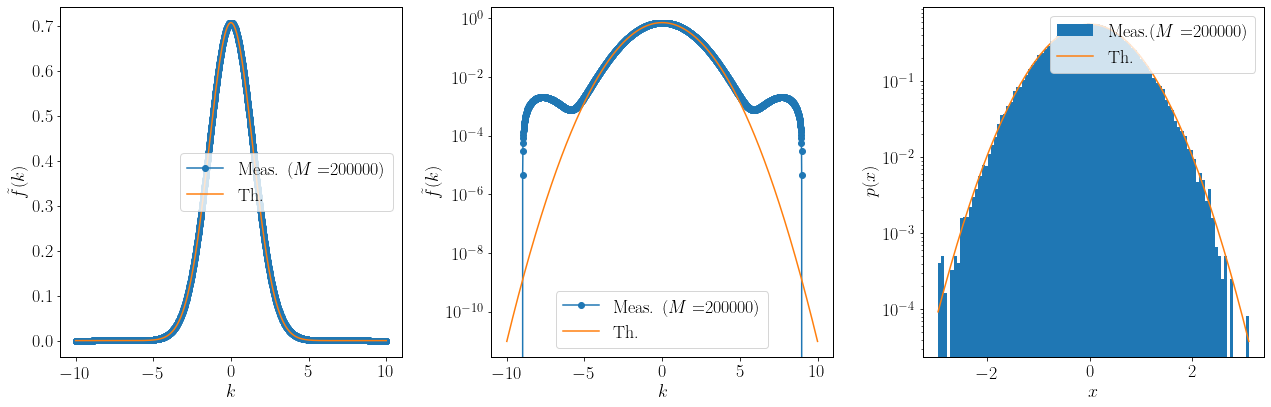

In [9]:
x = 0.
Delta = 2.
k = np.linspace(-10., 10., 2000)
tf = np.ones(len(k))
i = 0
M = 200000
Meq = 2000
while i < Meq:
    dx = Delta * ( - 1. + 2. * rnd.random_sample() )
    if proba(x + dx) > proba(x):
        x += dx
    else:
        r = rnd.random_sample()
        if proba(x + dx) / proba(x) > r:
            x += dx
    i += 1
i = 0
xx = [ x ]
while i < M:
    dx = Delta * ( - 1. + 2. * rnd.random_sample() )
    if proba(x + dx) > proba(x):
        x += dx
    else:
        r = rnd.random_sample()
        if proba(x + dx) / proba(x) > r:
            x += dx
    xx += [ x ]
    i += 1
    tf += np.cos(k * x)
tf /= M
tf /= np.sqrt(2.)

fig, ax = plt.subplots(1, 3, figsize = (18, 6), tight_layout = True)
ax[0].plot(k, tf, '-o', label='Meas. ' + r'$(M = $' + '{0})'.format(M))
ax[0].plot(k, np.exp(- k * k * 0.25) / np.sqrt(2.), label='Th.')
ax[1].semilogy(k, tf, '-o', label='Meas. ' + r'$(M = $' + '{0})'.format(M))
ax[1].semilogy(k, np.exp(- k * k * 0.25) / np.sqrt(2.), label='Th.')
ax[2].hist(np.array(xx), density = True, bins = 100, label = 'Meas.' + r'$(M = $' + '{0})'.format(M))
XX = np.linspace(min(xx), max(xx))
ax[2].plot(XX, np.exp( - XX ** 2) / np.sqrt(np.pi), label = 'Th.')
ax[2].set_yscale('log')
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$p(x)$')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$\tilde f(k)$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$\tilde f(k)$')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.show()

Question 2.2

/tmp/ipykernel_3091414/1846542840.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


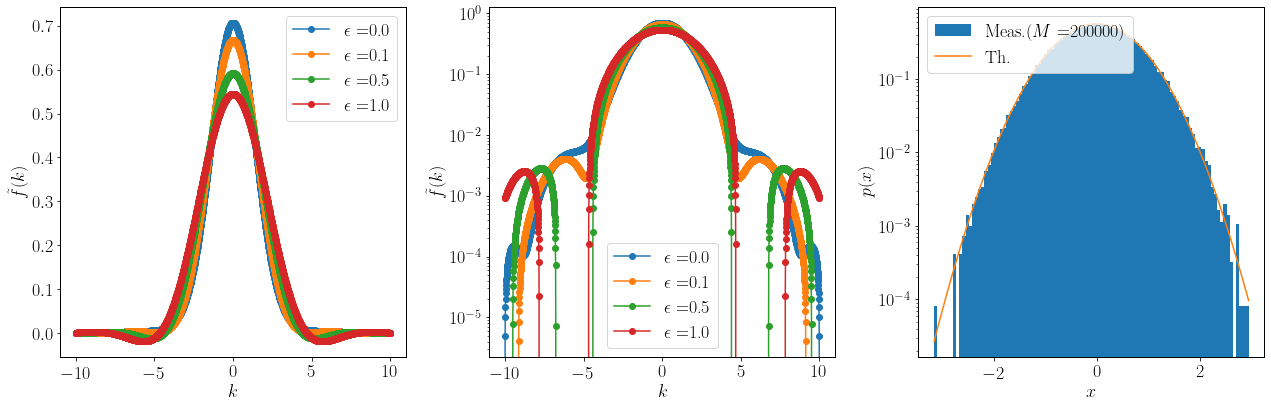

In [10]:
def proba(y):
    return np.exp(- y * y) / np.sqrt(np.pi)

x = 0.
Delta = 2.
k = np.linspace(-10., 10., 2000)
eps = np.array([0., 0.1, 0.5, 1.])
tf_eps = np.ones((len(eps), len(k)))
i = 0
xx = [ x ]
M = 200000
while i < M:
    dx = Delta * ( - 1. + 2. * rnd.random_sample() )
    if proba(x + dx) > proba(x):
        x += dx
    else:
        r = rnd.random_sample()
        if proba(x + dx) / proba(x) > r:
            x += dx
    xx += [ x ]
    i += 1
    for l in range(len(eps)):
        tf_eps[l,:] += np.cos(k * x) * np.exp( - eps[l] * x ** 4)
for l in range(len(eps)):
    tf_eps[l,:] /= M
    tf_eps[l,:] /= np.sqrt(2.)

fig, ax = plt.subplots(1, 3, figsize = (18, 6), tight_layout = True)
for l in range(len(eps)):
    ax[0].plot(k, tf_eps[l,:], '-o', label=r'$\epsilon = ${0}'.format(eps[l]))
    ax[1].semilogy(k, tf_eps[l,:], '-o', label=r'$\epsilon = ${0}'.format(eps[l]))
ax[2].hist(np.array(xx), density = True, bins = 100, label = 'Meas.' + r'$(M = $' + '{0})'.format(M))
XX = np.linspace(min(xx), max(xx))
ax[2].plot(XX, np.exp( - XX ** 2) / np.sqrt(np.pi), label = 'Th.')
ax[2].set_yscale('log')
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$p(x)$')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$\tilde f(k)$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$\tilde f(k)$')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.show()

Question 3.1

In this question, we use the Monte Carlo method to estimate integrals with the new probability distribution $p(x)=Z^{-1}e^{-\frac{x^2}{2k_\mathrm{B}T}}$, where $Z$ is the partition function which reads
$$Z=\frac{1}{\int_{-\infty}^{+\infty} \mathrm{d}x e^{-\frac{x^2}{2k_\mathrm{B}T}}}=\sqrt{\frac{2k_\mathrm{B}T}{\pi}}.$$ 
For this new distribution $x=0$ is still its equilibrium value.

For each value of $k_\mathrm{B}T$, one has to properly tune $\Delta$ (acceptance rate between 20 \% and 50 \%) and $M$ (larger than several times the autocorrelation time of $x$). We begin with $\Delta$. As $T$ decreases, the distributions becomes narrower (its standard deviation varies as $\sqrt{k_\mathrm{B}T}$ and one has to decrease the value of $\Delta$ in order to meet the criterion on the acceptance rate. Numerically, we find that the data for the acceptance rate for several values of $T$ collapse on a single curve when $\Delta$ is rescaled by $\sqrt{k_\mathrm{B}T}$, suggesting that taking $\Delta\simeq 4\sqrt{k_\mathrm{B}T}$ is reasonable (corresponding to an acceptance rate of about 40 \%).

/tmp/ipykernel_3091414/1453506964.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


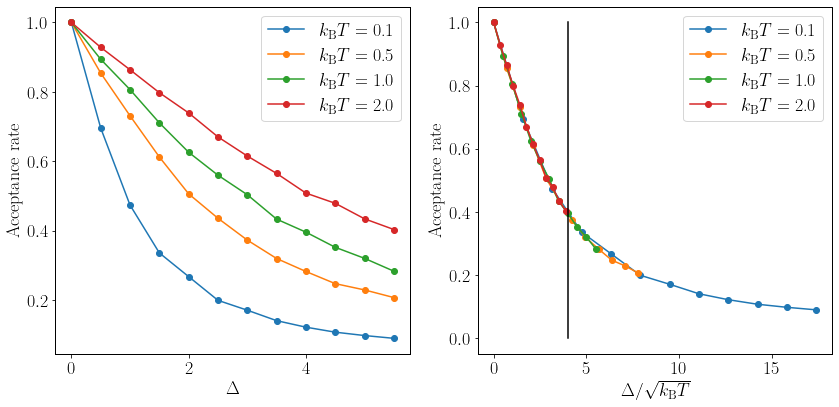

In [11]:
def proba(y, kT):
    return np.exp(- 0.5 * y * y / kT) * np.sqrt(2. * kT / np.pi)

Delta = np.arange(0., 6., 0.5)
kt = np.array([0.1, 0.5, 1., 2.])
Acc_rate = np.zeros((len(kt),len(Delta)))
M = 10000
for k in range(len(kt)):
    for j in range(len(Delta)):
        x = 0.
        i = 0
        rnd.seed()
        while i < M:
            dx = Delta[j] * ( - 1. + 2. * rnd.random_sample() )
            if proba(x + dx, kt[k]) > proba(x, kt[k]):
                x += dx
                Acc_rate[k,j] += 1.
            else:
                r = rnd.random_sample()
                if proba(x + dx, kt[k]) / proba(x,kt[k]) > r:
                    x += dx
                    Acc_rate[k,j] += 1.
            i += 1
        Acc_rate[k,j] /= M

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
for k in range(len(kt)):
    ax[0].plot(Delta, Acc_rate[k,:], '-o', label = r'$k_\mathrm{B}T = $' + ' {0}'.format(kt[k]))
    ax[1].plot(Delta / kt[k] ** .5, Acc_rate[k,:], '-o', label = r'$k_\mathrm{B}T = $' + ' {0}'.format(kt[k]))
ax[1].plot(np.array([4., 4.]), np.array([0., 1.]), '-k')
ax[0].set_xlabel(r'$\Delta$')
ax[0].set_ylabel(r'Acceptance rate')
ax[1].set_xlabel(r'$\Delta/\sqrt{k_\mathrm{B}T}$')
ax[1].set_ylabel(r'Acceptance rate')
ax[0].legend()
ax[1].legend()
fig.show()

We now proceed with $M$ by computing the autocorrelation function of $x$ for several values of $k_\mathrm{B}T$. We observe that it is temperature-independent and about few steps only.

/tmp/ipykernel_3091414/3965787872.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


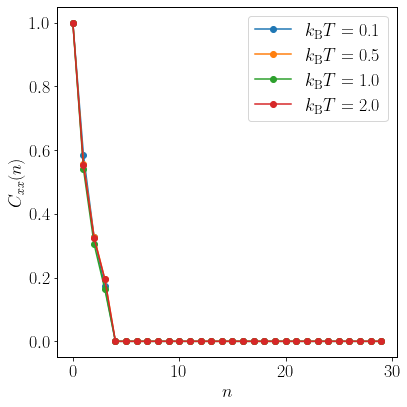

In [12]:
M = 15000
kt = np.array([0.1, 0.5, 1., 2.])
C = np.zeros((len(kt),M // 500))
for k in range(len(kt)):
    i = 0
    x = 0.
    Delta = 4. * np.sqrt(kt[k])
    rnd.seed()
    xx = [ x ]
    while i < M:
        dx = Delta * ( - 1. + 2. * rnd.random_sample() )
        if proba(x + dx,kt[k]) > proba(x,kt[k]):
            x += dx
        else:
            r = rnd.random_sample()
            if proba(x + dx,kt[k]) / proba(x,kt[k]) > r:
                x += dx
        xx += [ x ]
        i += 1
    xx = np.array(xx)
    for i in range(1, len(C)):
        C[k,i] = np.mean(xx[i:] * xx[:-i])
    C[k,:] -= np.mean(xx) ** 2
    C[k,:] /= np.var(xx)
    C[k,0] = 1.

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
for k in range(len(kt)):
    ax.plot(C[k,:], '-o', label = r'$k_\mathrm{B}T = $' + ' {0}'.format(kt[k]))
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$C_{xx}(n)$')
ax.legend()
fig.show()

We can now answer the question asked and measure the variance of $x$ for several values of $k_\mathrm{B}T$.
For each value of $T$, we now use the bootstrap method to determine the uncertainty on the variance of $x$, because the different samples of $x$ are now correlated.

/tmp/ipykernel_3091414/1006809702.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


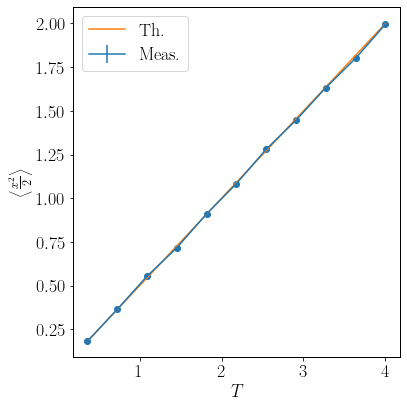

In [13]:
Meq = 1000
M = 100000
kt = np.linspace(0, 4, 12)
kt = kt[1:]
U = np.zeros(len(kt))
Uerr = np.zeros(len(kt))
nbt = 100
for k in range(len(kt)):
    i = 0
    Delta = 4. * np.sqrt(kt[k])
    x = 0.
    while i < Meq:
        dx = Delta * ( - 1. + 2. * rnd.random_sample() )
        if proba(x + dx,kt[k]) > proba(x,kt[k]):
            x += dx
        else:
            r = rnd.random_sample()
            if proba(x + dx,kt[k]) / proba(x,kt[k]) > r:
                x += dx
        i += 1
    i=0
    UU = [ 0.5 * x * x]
    while (i<M):
        dx = Delta * ( - 1. + 2. * rnd.random_sample() )
        if proba(x + dx,kt[k]) > proba(x,kt[k]):
            x += dx
        else:
            r = rnd.random_sample()
            if proba(x + dx,kt[k]) / proba(x,kt[k]) > r:
                x += dx
        i += 1
        UU += [0.5 * x * x]
        U[k] += 0.5 * x * x
    U[k] /= M
    mean_tmp = [ ]
    for j in range(nbt):
        r = rnd.random_sample(M)
        r *= M
        mean_tmp_j = 0.
        for i in range(M):
            mean_tmp_j += UU[int(r[i])]
        mean_tmp_j /= M
        mean_tmp += [ mean_tmp_j ]
    Uerr[k] = np.std(np.array(mean_tmp))

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.scatter(kt, U)
ax.errorbar(kt, U, Uerr, label = 'Meas.')
ax.plot(kt, 0.5 * kt, label = 'Th.')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$\left\langle \frac{x^2}{2}\right\rangle$')
ax.legend()
fig.show()

Question 3.2

Here, we also use the Monte Carlo method to compute integrals, with the same probability distribution as in the previous question, namely, 
$$p(x)=Z^{-1}e^{-\frac{x^2}{2k_\mathrm{B}T}}.$$
The average of a quantity $f(x)$ when $\epsilon\neq 0$ can be rewritten as
$$\left\langle f(x)\right\rangle_\epsilon =\frac{\int\mathrm{d}x f(x)e^{-\frac{x^2+\epsilon x^4}{2k_\mathrm{B}T}}}{\int\mathrm{d}x e^{-\frac{x^2+\epsilon x^4}{2k_\mathrm{B}T}}}=\frac{\left\langle f(x)e^{-\frac{\epsilon x^4}{2k_\mathrm{B}T}}\right\rangle}{\left\langle e^{-\frac{\epsilon x^4}{2k_\mathrm{B}T}}\right\rangle},$$
where $\langle.\rangle$ denotes the average with respect to the Gaussian distribution $p(x)$.

For this system, one can derive a modified equipartition theorem which gives that
$$\left\langle x\frac{\mathrm{d}}{\mathrm{d}x}\left(\frac{x^2+\epsilon x^4}{2}\right)\right\rangle_\epsilon=\left\langle x^2+2\epsilon x^4\right\rangle_\epsilon=k_\mathrm{B}T.$$
This implies that the average energy is no longer linear in $T$, but the above relation can be checked. In particular, the above relation implies that when $\langle \epsilon x^4\rangle$ becomes of the order of $\langle x^2\rangle$, the equipartition theorem for the energy does not hold anymore, even approximately.

/tmp/ipykernel_3091414/1213071182.py:128: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


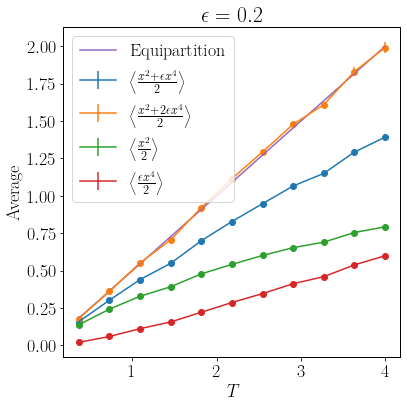

In [14]:
def proba(y, kT):
    return np.exp(- 0.5 * y * y / kT) * np.sqrt(2. * kT / np.pi)

Meq = 1000
M = 20000
eps = 0.2
kt = np.linspace(0, 4, 12)
kt = kt[1:]
denom = np.zeros(len(kt))
U = np.zeros(len(kt))
U2 = np.zeros(len(kt))
U4 = np.zeros(len(kt))
U_equi = np.zeros(len(kt))
Uerr = np.zeros(len(kt))
U2_err = np.zeros(len(kt))
U4_err = np.zeros(len(kt))
U_equi_err = np.zeros(len(kt))
denom_err = np.zeros(len(kt))
nbt = 100
for k in range(len(kt)):
    i = 0
    Delta = 4. * np.sqrt(kt[k])
    x = 0.
    while i < Meq:
        dx = Delta * ( - 1. + 2. * rnd.random_sample() )
        if proba(x + dx,kt[k]) > proba(x,kt[k]):
            x += dx
        else:
            r = rnd.random_sample()
            if proba(x + dx,kt[k]) / proba(x,kt[k]) > r:
                x += dx
        i += 1
    i=0
    tmp = np.exp(- 0.5 * eps * x ** 4 / kt[k])
    DENOM = [ tmp ]
    UU = [ 0.5 * x * x * ( 1. + eps * x * x ) * tmp ]
    UU_equi = [ 0.5 * x * x * ( 1. + 2. * eps * x * x ) * tmp ]
    UU2 = [ 0.5 * x * x * tmp ]
    UU4 = [ 0.5 * eps * x ** 4 * tmp ]
    while (i<M):
        dx = Delta * ( - 1. + 2. * rnd.random_sample() )
        if proba(x + dx,kt[k]) > proba(x,kt[k]):
            x += dx
        else:
            r = rnd.random_sample()
            if proba(x + dx,kt[k]) / proba(x,kt[k]) > r:
                x += dx
        i += 1
        tmp = np.exp(- 0.5 * eps * x ** 4 / kt[k])
        uu = 0.5 * x * x * ( 1. + eps * x * x ) * tmp
        uu2 = 0.5 * x * x * tmp
        uu4 = 0.5 * eps * x ** 4 * tmp
        uu_equi = 0.5 * x * x * ( 1. + 2. * eps * x * x ) * tmp
        DENOM += [ tmp ]
        UU += [ uu ]
        UU2 += [ uu2 ]
        UU4 += [ uu4 ]
        UU_equi += [ uu_equi ]
        U[k] += uu
        U2[k] += uu2
        U4[k] += uu4
        U_equi[k] += uu_equi
        denom[k] += tmp
    U[k] /= M
    U2[k] /= M
    U4[k] /= M
    U_equi[k] /= M
    denom[k] /= M
    mean_tmp = [ ]
    mean2_tmp = [ ]
    mean4_tmp = [ ]
    mean_tmp_equi = [ ]
    mean_tmp_denom = [ ]
    for j in range(nbt):
        r = rnd.random_sample(M)
        r *= M
        mean_tmp_j = 0.
        mean2_tmp_j = 0.
        mean4_tmp_j = 0.
        mean_tmp_equi_j = 0.
        mean_tmp_denom_j = 0.
        for i in range(M):
            mean_tmp_j += UU[int(r[i])]
            mean2_tmp_j += UU2[int(r[i])]
            mean4_tmp_j += UU4[int(r[i])]
            mean_tmp_equi_j += UU_equi[int(r[i])]
            mean_tmp_denom_j += DENOM[int(r[i])]
        mean_tmp_j /= M
        mean2_tmp_j /= M
        mean4_tmp_j /= M
        mean_tmp_equi_j /= M
        mean_tmp_denom_j /= M
        mean_tmp += [ mean_tmp_j ]
        mean2_tmp += [ mean2_tmp_j ]
        mean4_tmp += [ mean4_tmp_j ]
        mean_tmp_equi += [ mean_tmp_equi_j ]
        mean_tmp_denom += [ mean_tmp_denom_j ]
    denom_err[k] = np.std(np.array(mean_tmp_equi))
    # We use error propagation
    Uerr[k] = np.sqrt( ( np.std(np.array(mean_tmp)) / U[k] ) ** 2 + ( denom_err[k] / denom [k] ) ** 2 ) * U[k]
    U2_err[k] = np.sqrt( ( np.std(np.array(mean2_tmp)) / U[k] ) ** 2 + ( denom_err[k] / denom [k] ) ** 2 ) * U2[k]
    U4_err[k] = np.sqrt( ( np.std(np.array(mean4_tmp)) / U[k] ) ** 2 + ( denom_err[k] / denom [k] ) ** 2 ) * U4[k]
    U_equi_err[k] = np.sqrt( ( np.std(np.array(mean_tmp_equi)) / U_equi[k] ) ** 2 + 
    ( denom_err[k] / denom [k] ) ** 2 ) * U_equi[k]
    U[k] /= denom[k]
    U2[k] /= denom[k]
    U4[k] /= denom[k]
    U_equi[k] /= denom[k]
    Uerr[k] /= denom[k]
    U2_err[k] /= denom[k]
    U4_err[k] /= denom[k]
    U_equi_err[k] /= denom[k]

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.scatter(kt, U)
ax.errorbar(kt, U, Uerr, label = r'$\left\langle \frac{x^2+\epsilon x^4}{2}\right\rangle$')
ax.scatter(kt, U_equi)
ax.errorbar(kt, U_equi, U_equi_err, label = r'$\left\langle \frac{x^2+2\epsilon x^4}{2}\right\rangle$')
ax.scatter(kt, U2)
ax.errorbar(kt, U2, U2_err, label = r'$\left\langle \frac{x^2}{2}\right\rangle$')
ax.scatter(kt, U4)
ax.errorbar(kt, U4, U4_err, label = r'$\left\langle \frac{\epsilon x^4}{2}\right\rangle$')
ax.plot(kt, 0.5 * kt, label = 'Equipartition')
ax.set_xlabel(r'$T$')
ax.set_ylabel('Average')
ax.set_title(r'$\epsilon={0}$'.format(eps))
ax.legend()
fig.show()